# Lab 5 KNN Assignment

Name : Dhanraj Kore

Roll No : 60

Batch : B3

# K-Nearest Neighbors (K-NN)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import operator

# Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test)

# Training the K-NN model on the Training set

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Predicting a new result

In [7]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy is : ",accuracy_score(y_test, y_pred))

[[64  4]
 [ 3 29]]
Accuracy is :  0.93


# Improving accuracy

In [24]:
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    for x in range(len(trainingSet)):
        
        # Calculating the distance between test data and each row of training data
        
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        # based on the distance value, sorting them in ascending order
        distances[x] = dist[0]
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
 
    neighbors = []
    
    #  choosing the top K rows from the sorted array
    
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes = {}
    
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
            
    # assigning a class to the test point based on most frequent class of these rows.
    
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)


testSet = [[7.2, 3.6]]
test = pd.DataFrame(testSet)


print('\n\nWith 1 Nearest Neighbour \n\n')
k =18
result,neigh = knn(dataset, test, k)

print('\nPredicted Class of the datapoint = ', result)

print('\nNearest Neighbour of the datapoints = ',neigh)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report : ")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy : ",result2)



With 1 Nearest Neighbour 



Predicted Class of the datapoint =  0

Nearest Neighbour of the datapoints =  [92, 150, 43, 155, 32, 180, 79, 40, 128, 58, 29, 13, 74, 0, 66, 45, 60, 1]
Confusion Matrix : 
[[55  3]
 [ 1 21]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

Accuracy :  0.95


# Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


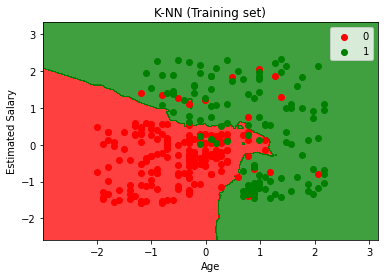

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


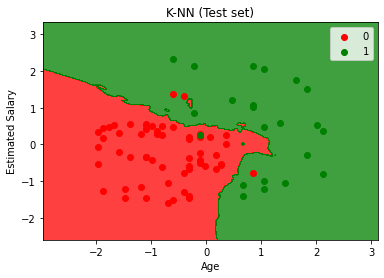

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()